In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv('/content/breast_cancer1.csv')


In [3]:

print("Dataset Info:\n")
print(data.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       556 non-null    int64  
 1   diagnosis                556 non-null    object 
 2   radius_mean              556 non-null    float64
 3   texture_mean             556 non-null    float64
 4   perimeter_mean           556 non-null    float64
 5   area_mean                556 non-null    float64
 6   smoothness_mean          556 non-null    float64
 7   compactness_mean         556 non-null    float64
 8   concavity_mean           556 non-null    float64
 9   concave points_mean      556 non-null    float64
 10  symmetry_mean            556 non-null    float64
 11  fractal_dimension_mean   556 non-null    float64
 12  radius_se                556 non-null    float64
 13  texture_se               556 non-null    float64
 14  perimeter_s

In [4]:

print("\nFirst Few Rows:\n")
print(data.head())


First Few Rows:

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimet

In [5]:

print("\nMissing Values:\n")
print(data.isnull().sum())


Missing Values:

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
if 'id' in data.columns:
    data.drop(['id'], axis=1, inplace=True)
elif 'Id' in data.columns:
    data.drop(['Id'], axis=1, inplace=True)


In [9]:

target_column = 'target'

if target_column not in data.columns:
    if 'diagnosis' in data.columns:
        target_column = 'diagnosis'
    else:
        raise ValueError("Target column ('target' or 'diagnosis') not found in the dataset.")


if data[target_column].dtype == 'object':
    le = LabelEncoder()
    data[target_column] = le.fit_transform(data[target_column])


In [12]:

target_column = None
if 'target' in data.columns:
    target_column = 'target'
elif 'diagnosis' in data.columns:
    target_column = 'diagnosis'
else:
    raise ValueError("Target column ('target' or 'diagnosis') not found in the dataset.")

X = data.drop(target_column, axis=1)
y = data[target_column]

In [13]:




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [16]:


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [17]:


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', 'passthrough')
])

In [18]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [19]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [20]:

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} Mean CV Accuracy: {scores.mean():.4f}")


Logistic Regression Mean CV Accuracy: 0.9752
Random Forest Mean CV Accuracy: 0.9594
SVM Mean CV Accuracy: 0.9729
Decision Tree Mean CV Accuracy: 0.9189


In [22]:

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se'...
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   'passthrough')]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [27]:
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

In [28]:

accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy:", accuracy)


Test Accuracy: 0.9642857142857143


In [29]:

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[72  1]
 [ 3 36]]


In [30]:

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)




Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        73
           1       0.97      0.92      0.95        39

    accuracy                           0.96       112
   macro avg       0.97      0.95      0.96       112
weighted avg       0.96      0.96      0.96       112



In [31]:

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9913944502985599


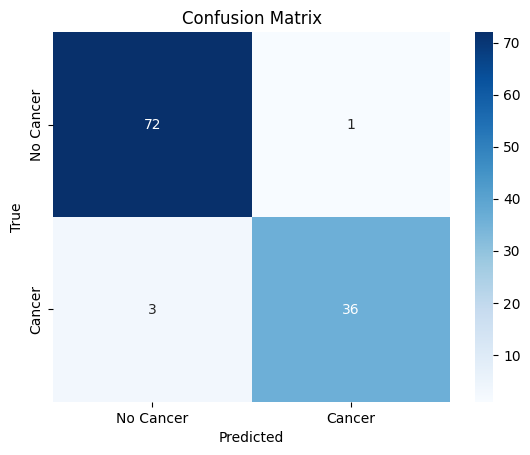

In [32]:

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [34]:

if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    importances = best_model.named_steps['classifier'].feature_importances_
    feature_names = preprocessor.get_feature_names_out()
    feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
    print("\nFeature Importances:\n", feature_importances)



Feature Importances:
                          Feature  Importance
27     num__concave points_worst    0.164654
23               num__area_worst    0.140697
7       num__concave points_mean    0.102267
6            num__concavity_mean    0.084393
22          num__perimeter_worst    0.068857
20             num__radius_worst    0.060742
2            num__perimeter_mean    0.058326
26          num__concavity_worst    0.043933
3                 num__area_mean    0.042581
0               num__radius_mean    0.036998
13                  num__area_se    0.029614
21            num__texture_worst    0.022163
1              num__texture_mean    0.020789
25        num__compactness_worst    0.019511
10                num__radius_se    0.016377
24         num__smoothness_worst    0.011564
5          num__compactness_mean    0.011461
12             num__perimeter_se    0.010166
15           num__compactness_se    0.006120
29  num__fractal_dimension_worst    0.006064
28           num__symmetry_worst

In [35]:

X_test['Cancer_Probability'] = y_pred_prob
X_test['Cancer_Prediction'] = y_pred

In [36]:



print("\nPredictions on Test Data:\n")
print(X_test[['Cancer_Probability', 'Cancer_Prediction']].head())


Predictions on Test Data:

     Cancer_Probability  Cancer_Prediction
457                0.06                  0
167                0.97                  1
55                 0.00                  0
245                0.01                  0
70                 1.00                  1
